<b>United States COVID-19 Cases and Deaths by State

Date generated: Sat Oct 31 2020 17:39:10 GMT-0700 (Pacific Daylight Time)

In [1]:
import pandas as pd
import datetime as dt
import seaborn as sea
import matplotlib.pyplot as plt

In [2]:
cspud = pd.read_csv("COVID-19_Case_Surveillance_Public_Use_Data.csv", 
                    dtype={"cdc_report_dt": "string", "pos_spec_dt": "string","onset_dt": "string",
                           "current_status": "string","sex": "string","age_group": "string",
                           "Race and ethnicity '('combined)": "string","hosp_yn": "string","icu_yn": "string",
                           "death_yn": "string","medcond_yn": "string"})

In [3]:
cspud.head()

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn
0,2020/03/22,2020/03/15,2020/03/11,Laboratory-confirmed case,Female,0 - 9 Years,"Multiple/Other, Non-Hispanic",Yes,Yes,No,Yes
1,2020/03/23,2020/03/15,<NA>,Laboratory-confirmed case,Female,0 - 9 Years,Unknown,Unknown,Unknown,Unknown,Unknown
2,2020/03/15,2020/03/15,<NA>,Laboratory-confirmed case,Female,0 - 9 Years,Unknown,Missing,Missing,Missing,Missing
3,2020/03/15,2020/03/15,<NA>,Laboratory-confirmed case,Female,0 - 9 Years,Unknown,Missing,Missing,Missing,Missing
4,2020/03/15,2020/03/15,<NA>,Laboratory-confirmed case,Female,0 - 9 Years,Unknown,Missing,Missing,Missing,Missing


In [4]:
cspud.tail()

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn
4481057,2020/09/15,2020/09/15,<NA>,Laboratory-confirmed case,Female,Unknown,"White, Non-Hispanic",Missing,Missing,Missing,Missing
4481058,2020/09/15,2020/09/15,<NA>,Laboratory-confirmed case,Male,Unknown,Unknown,Missing,Missing,Missing,Missing
4481059,2020/09/15,2020/09/15,<NA>,Laboratory-confirmed case,Female,Unknown,Unknown,Missing,Missing,Missing,No
4481060,2020/09/15,2020/09/15,<NA>,Probable Case,Missing,Unknown,"White, Non-Hispanic",No,Unknown,No,Yes
4481061,2020/09/15,2020/09/17,2020/09/15,Laboratory-confirmed case,Female,Unknown,Unknown,No,Unknown,No,Unknown


In [5]:
invalidAgeEntry =0
for nas,csa in zip(cspud['age_group'].isna(),cspud['age_group']):
    if(nas):
        invalidAgeEntry +=1
invalidAgeEntry

93

In [6]:
ageGroup = cspud['age_group']
deathStatus = cspud['death_yn']
ageGroupNA = ageGroup.isna()

ageGroups = ["0 - 9 Years", "10 - 19 Years", "20 - 39 Years", "40 - 49 Years", "50 - 59 Years", "60 - 69 Years", "70 - 79 Years", "80+ Years", "Uknown"]

##Tab up entries with that resulted in death by age group.

deathsByAge = [0] * len(ageGroups)

for d,ard,ardna in zip(deathStatus, ageGroup, ageGroupNA):
    if(d == 'Yes' and ardna == False):
        for ag in ageGroups:
            if(ard == ag):
                deathsByAge[ageGroups.index(ag)] +=1

for ags,dba in zip(ageGroups,deathsByAge):
    print (ags, ':', dba)

totalDeathsByAge = sum(deathsByAge)

print ('Total Deaths: ', totalDeathsByAge)

0 - 9 Years : 49
10 - 19 Years : 83
20 - 39 Years : 0
40 - 49 Years : 4263
50 - 59 Years : 11000
60 - 69 Years : 22900
70 - 79 Years : 33526
80+ Years : 62164
Uknown : 0
Total Deaths:  133985


In [30]:
covidStatus = cspud['current_status']

covidDeathsByAge = [0] * len(ageGroups)

for d,ard,ardna,cs in zip(deathStatus, ageGroup, ageGroupNA, covidStatus):
    if(d == 'Yes' and ardna == False and cs == 'Laboratory-confirmed case'):
        for ag in ageGroups:
            if(ard == ag):
                covidDeathsByAge[ageGroups.index(ag)] +=1

for ags,dba in zip(ageGroups,covidDeathsByAge):
    print (ags, ':', dba)

totalCovidDeathsByAge = sum(covidDeathsByAge)

print ('Total Deaths: ', totalCovidDeathsByAge)

0 - 9 Years : 47
10 - 19 Years : 81
20 - 39 Years : 0
40 - 49 Years : 4010
50 - 59 Years : 10338
60 - 69 Years : 21747
70 - 79 Years : 32012
80+ Years : 59014
Uknown : 0
Total Deaths:  127249


In [27]:
for ard,ardna,cs in zip(ageGroup, ageGroupNA, covidStatus):
    if(ardna == False and cs == 'Laboratory-confirmed case'):
        for ag in ageGroups:
            if(ard == ag):
                deathsByAge[ageGroups.index(ag)] +=1

for ags,dba in zip(ageGroups,deathsByAge):
    print (ags, ':', dba)

totalDeathsByAge = sum(deathsByAge)

print ('Total Laboratory-confirmed cases: ', totalDeathsByAge)

0 - 9 Years : 269336
10 - 19 Years : 739398
20 - 39 Years : 0
40 - 49 Years : 1348491
50 - 59 Years : 1308784
60 - 69 Years : 942245
70 - 79 Years : 574146
80+ Years : 575670
Uknown : 0
Total Laboratory-confirmed cases:  5758070


In [7]:
comorbidity = cspud['medcond_yn']

##Tab up entries with the same mortality condition.

coMo =0
coMoDeath =0

for c,d in zip(comorbidity, deathStatus):
    if (c == 'Yes'):
        coMo +=1
    if (d == 'Yes' and c == 'Yes'):
            coMoDeath +=1
print('Total Comorbidity Cases: ', coMo, 'Total Comorbidity Deaths: ', coMoDeath)

Total Comorbidity Cases:  567767 Total Comorbidity Deaths:  64598


In [34]:
deathsByAgeCoMo = [0] * len(ageGroups)

for c,d,ard,ardna,cs in zip(comorbidity, deathStatus, ageGroup, ageGroupNA, covidStatus):
    if(d == 'Yes' and c == "Yes" and ardna == False and cs == 'Laboratory-confirmed case'):
        for ag in ageGroups:
            if(ard == ag):
                deathsByAgeCoMo[ageGroups.index(ag)] +=1

for ags,dba in zip(ageGroups,deathsByAgeCoMo):
    print (ags, ':', dba)

coMoDeaths = sum(deathsByAgeCoMo)
coMoDeathRatio = coMoDeaths / totalCovidDeathsByAge

print ('Comorbidity Deaths: ', coMoDeaths, 'Comorbidity Death Percentage: ', (coMoDeathRatio*100))

0 - 9 Years : 11
10 - 19 Years : 28
20 - 39 Years : 0
40 - 49 Years : 1716
50 - 59 Years : 4926
60 - 69 Years : 10718
70 - 79 Years : 15503
80+ Years : 27050
Uknown : 0
Comorbidity Deaths:  59952 Comorbidity Death Percentage:  47.113926239106


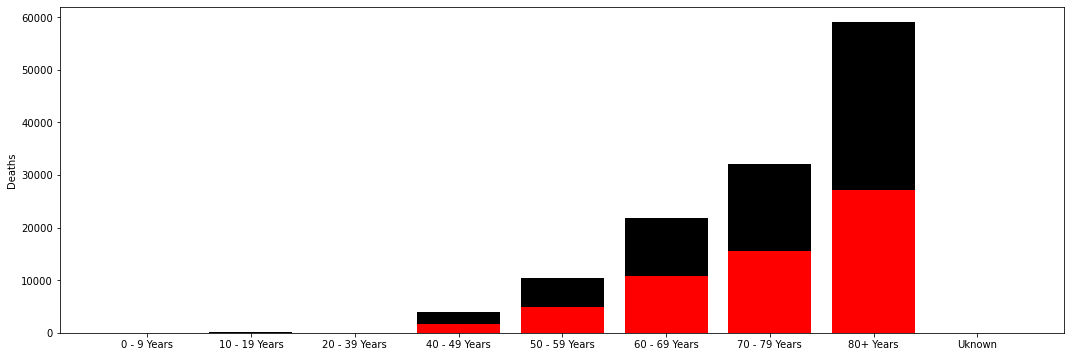

In [33]:
plt.figure(figsize=(18,6))

plt.bar(ageGroups, covidDeathsByAge, color='black')
plt.bar(ageGroups, deathsByAgeCoMo, color='red')
plt.ylabel('Deaths')
plt.show()

In [35]:
##Tab up entries with the same mortality condition.

deaths=0
unknown=0
lived=0
missing=0

for d in deathStatus:
    if(d == 'Yes'):
        deaths +=1
    if(d == 'No'):
        lived +=1
    if(d == 'Unknown'):
        unknown +=1
    if(d == 'Missing'):
        missing +=1
        
total = deaths + missing + unknown + lived
        
print('Deaths: ', deaths, 'Lived: ', lived, 'Uknown: ', unknown, 'Missing: ', missing, 'Total: ', total)

Deaths:  136408 Lived:  2075244 Uknown:  529408 Missing:  1740002 Total:  4481062


In [ ]:
covidDeathsByAge = [0] * len(ageGroups)

for d,ard,ardna,cs in zip(deathStatus, ageGroup, ageGroupNA, covidStatus):
    if(d == 'Yes' and ardna == False and cs == 'Laboratory-confirmed case'):
        for ag in ageGroups:
            if(ard == ag):
                covidDeathsByAge[ageGroups.index(ag)] +=1

for ags,dba in zip(ageGroups,covidDeathsByAge):
    print (ags, ':', dba)

totalCovidDeathsByAge = sum(covidDeathsByAge)

print ('Total Deaths: ', totalCovidDeathsByAge)

In [23]:
mortalityRatio = deaths/ lived 

additionalMissingDeaths = int(mortalityRatio * missing)
additionalUnknownDeaths = int(mortalityRatio * unknown)

print('Mortality Ratio: ', mortalityRatio, 'Deaths adjusted for mortality ratio: ', additionalMissingDeaths + additionalUnknownDeaths + deaths)

Mortality Ratio:  0.06573106584093244 Deaths adjusted for mortality ratio:  285578


In [13]:
cdbsot = pd.read_csv("~/Downloads/United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv")

cdbsot.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,01/22/2020,CO,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
1,01/23/2020,CO,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
2,01/24/2020,CO,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
3,01/25/2020,CO,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
4,01/26/2020,CO,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree


In [14]:
reportedNewDeaths = cdbsot['new_death']

reportedTotalDeaths = sum(reportedNewDeaths)

reportedTotalDeaths

229109

In [15]:
deathTotalDifference = reportedTotalDeaths - deaths

deathByAgeTotalDifference = reportedTotalDeaths - totalDeathsByAge

print(deathTotalDifference, deathByAgeTotalDifference)

92701 95124


In [16]:
cdbs = pd.read_csv("~/Downloads/united_states_covid19_cases_and_deaths_by_state.csv")

cdbs.head()

,State/Territory,Total Cases,Confirmed Cases,Probable Cases,Cases in Last 7 Days,Case Rate per 100000,Total Deaths,Confirmed Deaths,Probable Deaths,Deaths in Last 7 Days,Death Rate per 100000,Case Rate per 100000 in Last 7 Days,Death Rate per 100K in Last 7 Days
0,Alaska,14837,NaN,NaN,2719,2012,81,NaN,NaN,13,10,52.7,0.3
1,Alabama,190496,162720.0,27776.0,9580,3897,2932,2735.0,197.0,73,59,28.0,0.2
2,Arkansas,110874,NaN,NaN,6739,3679,1900,NaN,NaN,118,63,31.9,0.6
3,American Samoa,0,NaN,NaN,0,0,0,NaN,NaN,0,0,0.0,0.0
4,Arizona,244045,238356.0,5689.0,8163,3403,5934,5641.0,293.0,69,82,16.3,0.1


In [17]:
reportedStateDeaths = cdbs['Total Deaths']

reportedStateTotalDeaths = sum(reportedStateDeaths)

reportedStateTotalDeaths

229109

In [18]:
populationData = pd.read_csv('nst-est2019-alldata.csv')

In [19]:
populationData.head()

,SUMLEV,REGION,DIVISION,STATE,NAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,...,RDOMESTICMIG2019,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017,RNETMIG2018,RNETMIG2019
0,10,0,0,0,United States,308745538,308758105,309321666,311556874,313830990,...,0.000000,2.493773,2.682083,2.636187,2.921500,3.260435,3.252788,2.871957,2.153911,1.818059
1,20,1,0,0,Northeast Region,55317240,55318443,55380134,55604223,55775216,...,-5.254530,0.887909,-0.038355,-0.469783,-0.986097,-2.061965,-2.490484,-1.837048,-2.134447,-2.859713
2,20,2,0,0,Midwest Region,66927001,66929725,66974416,67157800,67336743,...,-2.365881,-0.963930,-0.973943,-0.006924,-0.762969,-1.388437,-1.241784,-0.557370,-0.922755,-1.111173
3,20,3,0,0,South Region,114555744,114563030,114866680,116006522,117241208,...,3.261349,5.130513,5.850458,5.292073,6.161501,7.277358,7.150074,6.198168,5.225519,5.203720
4,20,4,0,0,West Region,71945553,71946907,72100436,72788329,73477823,...,0.614245,2.723344,3.062896,3.162262,4.026429,4.987285,5.261078,4.021194,3.044951,2.312083


7/1/2019 resident total population estimate

In [20]:
populationData['NAME'][0]

'United States'

In [21]:
population2019 = populationData['POPESTIMATE2019']

In [22]:
population2019[0]

328239523

<b>Citation</b>

-<i>Centers for Disease Control and Prevention, COVID-19 Response. COVID-19 Case Surveillance Public Data Access, Summary, and Limitations (version date: September 30, 2020).